In [2]:
import torch
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt


here we can add gussian noise or other filters so that our image can be increased in size and make classificatin robust

In [3]:
# Define a complex augmentation pipeline
augmentations = transforms.Compose([
    transforms.RandomHorizontalFlip(),           # Flip images horizontally
    transforms.RandomRotation(20),               # Rotate images randomly
    transforms.ColorJitter(brightness=0.2,       # Adjust brightness
                           contrast=0.2, 
                           saturation=0.2),
    transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),  # Random crop and resize
    transforms.ToTensor()
])

In [4]:
# Load CIFAR-10 with augmentations
augmented_data = datasets.MNIST(root='./data', train=True, download=True, transform=augmentations)
loader = torch.utils.data.DataLoader(augmented_data, batch_size=8, shuffle=True)
 


In [5]:
# Display a batch of augmented images
images, labels = next(iter(loader))
grid = make_grid(images, nrow=4)
 


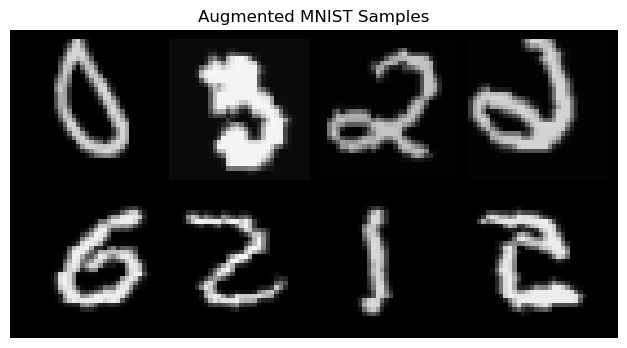

In [7]:
# Convert to numpy and plot
plt.figure(figsize=(8, 4))
plt.imshow(grid.permute(1, 2, 0))  # Rearrange dimensions for plotting
plt.axis('off')
plt.title('Augmented MNIST Samples')
plt.show()